## Grab Data Via API

In [1]:
import requests

In [2]:
def get_stock_data(ticker, start_date, end_date):
    base_url = f'https://api.tiingo.com/tiingo/daily/{ticker}/prices?'
    api_key = '50dbca4a8576228510cb129fe07db8e9a178bb9b'
    payload = {
        'token': api_key, 
        'startDate': start_date,
        'endDate': end_date
    }
    response = requests.get(base_url, params=payload)
    return response

In [3]:
data_response = get_stock_data('LMND', '2020-06-01', '2020-10-31')
print(data_response.url)
print(data_response.json())

https://api.tiingo.com/tiingo/daily/LMND/prices?token=50dbca4a8576228510cb129fe07db8e9a178bb9b&startDate=2020-06-01&endDate=2020-10-31
[{'date': '2020-07-02T00:00:00.000Z', 'close': 69.41, 'high': 70.8, 'low': 49.02, 'open': 50.06, 'volume': 16697700, 'adjClose': 69.41, 'adjHigh': 70.8, 'adjLow': 49.02, 'adjOpen': 50.06, 'adjVolume': 16697700, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2020-07-06T00:00:00.000Z', 'close': 81.19, 'high': 96.51, 'low': 73.11, 'open': 73.39, 'volume': 13445700, 'adjClose': 81.19, 'adjHigh': 96.51, 'adjLow': 73.11, 'adjOpen': 73.394, 'adjVolume': 13445700, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2020-07-07T00:00:00.000Z', 'close': 78.79, 'high': 89.38, 'low': 75.0, 'open': 83.8, 'volume': 4599600, 'adjClose': 78.79, 'adjHigh': 89.38, 'adjLow': 75.0, 'adjOpen': 83.8, 'adjVolume': 4599600, 'divCash': 0.0, 'splitFactor': 1.0}, {'date': '2020-07-08T00:00:00.000Z', 'close': 68.51, 'high': 79.39, 'low': 68.06, 'open': 79.0, 'volume': 3489400, 'adjClose

In [5]:
def parse_data(data_response):
    json_data = data_response.json()
    
    dates = []
    highs = []
    lows = []
    opens = []
    closes = []
    vols = []
    
    for json_object in json_data:
        date = json_object['date']
        high = json_object['high']
        low = json_object['low']
        opened = json_object['open']
        close = json_object['close']
        vol = json_object['volume']
        
        dates.append(date)
        highs.append(high)
        lows.append(low)
        opens.append(opened)
        closes.append(close)
        vols.append(vol)
        
    return dates, highs, lows, opens, closes, vols
        

In [8]:
dates, highs, lows, opens, closes, vols = parse_data(data_response)

dates[:10]

['2020-07-02T00:00:00.000Z',
 '2020-07-06T00:00:00.000Z',
 '2020-07-07T00:00:00.000Z',
 '2020-07-08T00:00:00.000Z',
 '2020-07-09T00:00:00.000Z',
 '2020-07-10T00:00:00.000Z',
 '2020-07-13T00:00:00.000Z',
 '2020-07-14T00:00:00.000Z',
 '2020-07-15T00:00:00.000Z',
 '2020-07-16T00:00:00.000Z']

## Perform EDA on data (OneHotEncoding)

In [14]:
def calculate_price_difference(opens, closes):
    price_differences = []
    
    for i in range(0, len(opens)-1):
        if opens[i+1] >= closes[i]:
            price_differences.append([1, 0])
        else:
            price_differences.append([0, 1])
    
    return price_differences

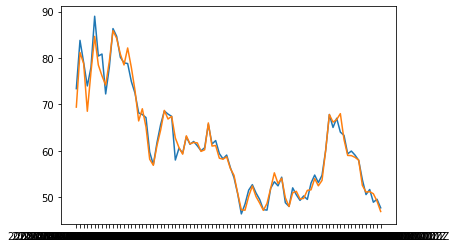

In [19]:
# visualize data
import matplotlib.pyplot as plt 

price_differences = calculate_price_difference(opens, closes)

differences = []
for difference in price_differences:
    differences.append(difference[0])
    
plt.plot(dates[1:], opens[1:])
plt.plot(dates[1:], closes[:-1])
plt.show()

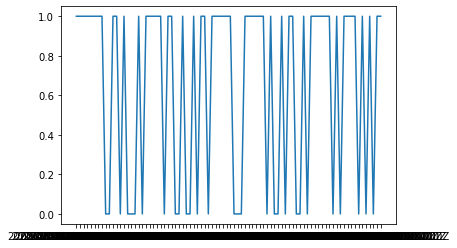

In [20]:
plt.plot(dates[1:], differences)
plt.show()

In [52]:
def create_datasets(ticker, start_date, end_date):
    data_response = get_stock_data('LMND', '2020-06-01', '2020-10-31')
    dates, highs, lows, opens, closes, vols = parse_data(data_response)
    
    
    labels = calculate_price_difference(opens, closes)
    
    inputs = []
    for i in range(len(labels)):
        inputs.append([closes[i], opens[i], highs[i], lows[i], vols[i]/1000])
        
    return inputs, labels
    
    

In [54]:
x_train, y_train = create_datasets('LMND', '2020-06-01', '2020-08-31')
x_test, y_test = create_datasets('LMND', '2020-06-01', '2020-10-31')

In [56]:
x_train, y_train

([[69.41, 50.06, 70.8, 49.02, 16697.7],
  [81.19, 73.39, 96.51, 73.11, 13445.7],
  [78.79, 83.8, 89.38, 75.0, 4599.6],
  [68.51, 79.0, 79.39, 68.06, 3489.4],
  [77.01, 73.97, 79.91, 69.03, 4165.2],
  [84.66, 78.01, 89.5, 78.0, 3723.1],
  [78.5, 89.0, 95.5, 77.91, 2646.8],
  [76.14, 80.42, 82.86, 70.85, 2085.6],
  [74.17, 80.85, 81.0, 72.5, 1352.0],
  [79.29, 72.25, 80.75, 72.03, 1448.2],
  [85.89, 78.0, 88.0, 76.14, 2047.3],
  [84.24, 86.34, 87.0, 82.0, 952.012],
  [80.85, 84.68, 85.2, 80.545, 510.426],
  [78.5, 80.17, 81.9, 77.0, 626.259],
  [82.16, 78.95, 86.8899, 78.61, 1664.554],
  [77.97, 78.8, 82.755, 75.5, 1167.532],
  [73.0, 74.94, 75.8996, 71.05, 2084.06],
  [66.43, 72.42, 73.5, 66.39, 1492.708],
  [69.05, 68.16, 70.5, 66.81, 975.693],
  [65.1, 67.81, 68.5399, 65.0, 852.695],
  [58.18, 67.15, 67.47, 57.52, 1884.678],
  [56.86, 59.71, 61.18, 56.7, 1615.313],
  [61.14, 57.0, 62.39, 57.0, 1495.653],
  [64.48, 61.77, 64.95, 59.27, 1136.577],
  [68.7, 65.68, 69.88, 64.6, 1154.199],

In [27]:
# y = mx + b 
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [28]:
x_input = tf.placeholder(dtype=tf.float32, shape=[None, 5])
y_input = tf.placeholder(dtype=tf.float32, shape=[None, 2])

m = tf.Variable(initial_value=tf.ones(shape=[5, 2])) 
b = tf.Variable(initial_value=tf.ones(shape=[2]))
y_output = tf.add(tf.matmul(x_input, m), b)


In [47]:
loss = tf.reduce_sum(tf.reduce_mean
                     (tf.nn.softmax_cross_entropy_with_logits_v2(
                         labels=y_input, logits=y_output)))

# optimizer = tf.train.AdamOptimizer(0.01)#.minize(loss)
optimizer = tf.train.GradientDescentOptimizer(0.0001)
train_step = optimizer.minimize(loss)

In [48]:
def measure_accuracy(actual, expected):
    num_correct = 0
    for i in range(len(actual)):
        actual_value = actual[i]
        expected_value = expected[i]
        if actual_value[0] >= actual_value[1] and expected_value[0] >= expected_value[1]:
            num_correct += 1 
        elif actual_value[0] <= actual_value[1] and expected_value[0] <= expected_value[1]:
            num_correct += 1 
            
    # calculate average
    return (num_correct / len(actual)) * 100
            

In [49]:
session = tf.Session()
session.run(tf.global_variables_initializer())


In [50]:
for _ in range(30000):
    session.run(train_step, feed_dict={x_input: x_train, y_input:y_train})
    
print(measure_accuracy(session.run(y_output, feed_dict={x_input: x_test}), y_test))

65.47619047619048


In [51]:
print(session.run(y_output, feed_dict={x_input: x_test}), y_test)

[[18140.861   15726.581  ]
 [14729.034   12805.869  ]
 [ 5236.1514   4616.601  ]
 [ 4015.82     3553.0808 ]
 [ 4744.239    4185.842  ]
 [ 4297.1094   3809.4905 ]
 [ 3153.2432   2822.7793 ]
 [ 2521.9229   2270.714  ]
 [ 1733.2231   1589.0865 ]
 [ 1831.3407   1674.9226 ]
 [ 2495.8074   2255.7683 ]
 [ 1331.645    1253.0096 ]
 [  850.3479    834.74963]
 [  962.00073   927.296  ]
 [ 2084.449    1898.9872 ]
 [ 1540.6687   1425.8083 ]
 [ 2506.2961   2252.5024 ]
 [ 1857.3025   1686.7946 ]
 [ 1297.734    1204.159  ]
 [ 1158.7823   1081.0372 ]
 [ 2252.4363   2018.5648 ]
 [ 1948.3988   1752.2722 ]
 [ 1821.9657   1645.6075 ]
 [ 1448.2288   1327.2548 ]
 [ 1483.9508   1363.5444 ]
 [  951.72504   903.8626 ]
 [ 1200.4812   1118.2587 ]
 [ 1303.5989   1203.8221 ]
 [ 2245.6416   2011.2787 ]
 [ 1301.111    1196.1355 ]
 [ 1365.2136   1254.155  ]
 [  961.9248    905.9495 ]
 [  744.6345    718.31244]
 [  609.1981    601.4693 ]
 [  779.1888    746.44214]
 [  674.47327   655.82117]
 [ 2069.8682   1864.747  ]
 